# Geoffrey Gund

In [1]:
#%% specifying data location data from gitHub, preparing data

import os
import xlrd
#folderData="https://raw.githubusercontent.com/geeoffgoond/project/master/"
folderData="https://rawgit.com/geeoffgoond/psrcdata/master/"
fileXL=os.path.join(folderData,"2015-pr1-hhsurvey-household.xlsx")

# importing data into pandas
import pandas as pd

psrchh=pd.read_excel(fileXL)

In [2]:
#%% limiting columns and data to what we need

psrchh=psrchh[["hhid", "hhnumtrips", "hh_income_detailed", "h_zip", "h_city", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min", "prev_home_loc_zip", "prev_home_loc_city", "prev_home_loc_st"]]

WASzip=psrchh[psrchh.prev_home_loc_st=='WA']

WASzip.reset_index(inplace=True,drop=True) # resetting the index -- good practice

#As the cells have integers, I am confident to use comparisons:
WASzip=WASzip[(WASzip.prev_home_loc_zip <=99403) & (WASzip.prev_home_loc_zip>=98001)]

#dropping na
WASzip.dropna(axis=0,inplace=True)

In [62]:
#%% limiting columns and data to what we're interested in
psrchh=psrchh[["hhid", "hhnumtrips", "hh_income_detailed", "h_zip", "h_city", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min", "prev_home_loc_zip", "prev_home_loc_city", "prev_home_loc_st"]]

#setting geographic level to Puget Sound Counties:
#restrict zips list because we want to restrict this to the Puget Sound region
fileZips=os.path.join(folderData,"waStateZips.xlsx") #gets list of zips by county in WA
waStateZips=pd.read_excel(fileZips) 

#set the counties we're interested in:
PugetSoundCounties = ["KING", "KITSAP", "PIERCE", "SNOHOMISH", "ISLANDS"] #can change
psZips = waStateZips[(waStateZips['County Name']).isin(PugetSoundCounties)] #creates a dataFrame of data from those counties
#PugetSoundZips #see the dataFrame to verify (if we'd like)

psZips.reset_index(inplace=True,drop=True) # resetting the index


psrchh = psrchh[(psrchh["h_zip"]).isin(psZips.zip)]

#dropping na
#PugetSoundZips.dropna(axis=0,inplace=True)

psrchh



,hhid,hhnumtrips,hh_income_detailed,h_zip,h_city,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min,prev_home_loc_zip,prev_home_loc_city,prev_home_loc_st
0,14100001,5,5,98109,SEATTLE,1,5,1,5,4,5,4,5,5,NaN,NaN,NaN
1,14100004,0,7,98119,SEATTLE,4,4,1,5,1,4,3,1,5,NaN,NaN,NaN
2,14100007,4,2,98109,SEATTLE,3,5,3,5,3,4,5,4,5,98335.0,GIG HARBOR,WA
3,14100008,3,1,98109,SEATTLE,4,4,3,4,3,3,4,3,3,NaN,NaN,NaN
4,14100009,11,98,98102,SEATTLE,1,5,1,1,1,5,1,1,1,NaN,NaN,NaN
5,14100010,5,7,98102,SEATTLE,4,4,1,5,3,2,5,1,4,NaN,NaN,NaN
6,14100012,4,1,98102,SEATTLE,3,4,1,5,4,4,5,4,5,NaN,NaN,NaN
7,14100013,6,6,98102,SEATTLE,1,4,1,5,2,4,5,4,5,NaN,NaN,NaN
8,14100015,9,9,98122,SEATTLE,2,1,3,1,2,3,1,2,2,NaN,NaN,NaN
9,14100019,3,2,98122,SEATTLE,1,5,1,5,5,5,5,1,1,NaN,NaN,NaN


In [8]:
#%% restrict zips list because we want to restrict this to the Puget Sound region
#fileZips=os.path.join(folderData,"waStateZips.xlsx")
#waStateZips=pd.read_excel(fileZips)


#set the counties we are interested in
#PugetSoundCounties = ["KING", "KITSAP", "PIERCE", "SNOHOMISH", "ISLANDS"] #can change
#PugetSoundZips = waStateZips[(waStateZips['County Name']).isin(PugetSoundCounties)] #creates a dataFrame of data from those counties
#PugetSoundZips #see the dataFrame to verify (if we'd like)
#PugetSoundZips = PugetSoundZips.zip #set it to just a list of the zips
#PugetSoundZips

148    98001
149    98002
150    98071
151    98092
152    98004
153    98005
154    98006
155    98007
156    98008
157    98009
158    98015
159    98010
160    98011
161    98041
162    98013
163    98014
164    98019
165    98022
166    98024
167    98003
168    98023
169    98063
170    98093
171    98025
172    98027
173    98029
174    98028
175    98030
176    98031
177    98032
       ...  
502    98201
503    98203
504    98204
505    98205
506    98206
507    98207
508    98208
509    98213
510    98251
511    98252
512    98256
513    98258
514    98036
515    98037
516    98046
517    98087
518    98270
519    98271
520    98082
521    98272
522    98043
523    98275
524    98259
525    98287
526    98290
527    98291
528    98296
529    98292
530    98293
531    98294
Name: zip, Length: 252, dtype: object

In [86]:
psrchh.reset_index(inplace=True,drop=True) #resetting the index again

In [4]:
#numericColumns =["hhnumtrips", "hh_income_detailed", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min"]
#aggregateBY=['prev_home_loc_zip']

#'as_index = False' avoids that the column of zip codes becomes a row name: 
#PS_zip_psrchh=PugetSoundZips.groupby (aggregateBY, as_index = False)[numericColumns].mean()

#see result:
#PS_zip_psrchh.head()

,prev_home_loc_zip,hhnumtrips,hh_income_detailed,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
0,98002.0,9.000000,2.333333,1.666667,5.000000,3.000000,4.666667,3.666667,2.333333,5.000000,2.000000,4.000000
1,98003.0,6.000000,3.571429,2.428571,4.428571,2.285714,4.000000,3.714286,3.285714,3.428571,3.428571,3.571429
2,98004.0,4.833333,37.583333,2.916667,3.750000,2.333333,4.250000,3.166667,3.083333,3.333333,3.250000,3.333333
3,98005.0,9.000000,9.000000,2.500000,2.500000,2.500000,2.000000,4.500000,2.500000,2.500000,2.500000,4.500000
4,98006.0,9.666667,6.500000,3.166667,3.666667,3.000000,3.833333,3.333333,3.000000,2.500000,4.000000,3.333333


In [18]:
psrchh['hh_income_detailed'].describe()

count    2418.000000
mean       15.109595
std        28.668998
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        98.000000
Name: hh_income_detailed, dtype: float64

In [19]:
psrchh['hhnumtrips'].describe()

count    2418.000000
mean        7.736146
std         5.892418
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        62.000000
Name: hhnumtrips, dtype: float64

In [63]:
import numpy as np  #numpy manages the nan for pandas
symbolsForNA=[98]
psrchh['hh_income_detailed'].replace(symbolsForNA,np.nan,inplace=True) #replacing missing values (gets warning :/)
psrchh['hh_income_detailed']

0        5.0
1        7.0
2        2.0
3        1.0
4        NaN
5        7.0
6        1.0
7        6.0
8        9.0
9        2.0
10       5.0
11       2.0
12       4.0
13       6.0
14       2.0
15       NaN
16       3.0
17       7.0
18       6.0
19       NaN
20       7.0
21       7.0
22       7.0
23       7.0
24       5.0
25       NaN
26       NaN
27       3.0
28       4.0
29       5.0
        ... 
2389     5.0
2390     4.0
2391     1.0
2392     5.0
2393     6.0
2394     4.0
2395     3.0
2396     2.0
2397     2.0
2398     NaN
2399     6.0
2400     7.0
2401     7.0
2402     5.0
2403     7.0
2404     8.0
2405     8.0
2406     6.0
2407     7.0
2408     2.0
2409     3.0
2410     4.0
2411     5.0
2412     6.0
2413     8.0
2414     5.0
2415     4.0
2416    10.0
2417     6.0
2418     4.0
Name: hh_income_detailed, Length: 2418, dtype: float64

# Clustering

In [51]:
#%% clustering
#len(psrchh.hhid.unique())==len(psrchh.hhid) #checking to make sure hhids are unique
psrchh.index=psrchh.hhid #setting hhid as the index
psrchh.iloc[:,5:14].dtypes #checking dtypes of clustering columns

res_factors_hhchange    int64
res_factors_afford      int64
res_factors_school      int64
res_factors_walk        int64
res_factors_space       int64
res_factors_closefam    int64
res_factors_transit     int64
res_factors_hwy         int64
res_factors_30min       int64
dtype: object

In [64]:
# standardize data:
from sklearn import preprocessing

ps_scaled = preprocessing.scale(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'])

#compute similarity matrix
from scipy.spatial.distance import pdist, squareform

psSimi_simple = pdist(ps_scaled,metric='euclidean') # output is not matrix
psSimi_matrix =squareform(psSimi_simple) # this is a matrix

In [65]:
from scipy.cluster.hierarchy import linkage, cut_tree
# computing the linkage
psSimi_link = linkage(psSimi_simple,method='average') 

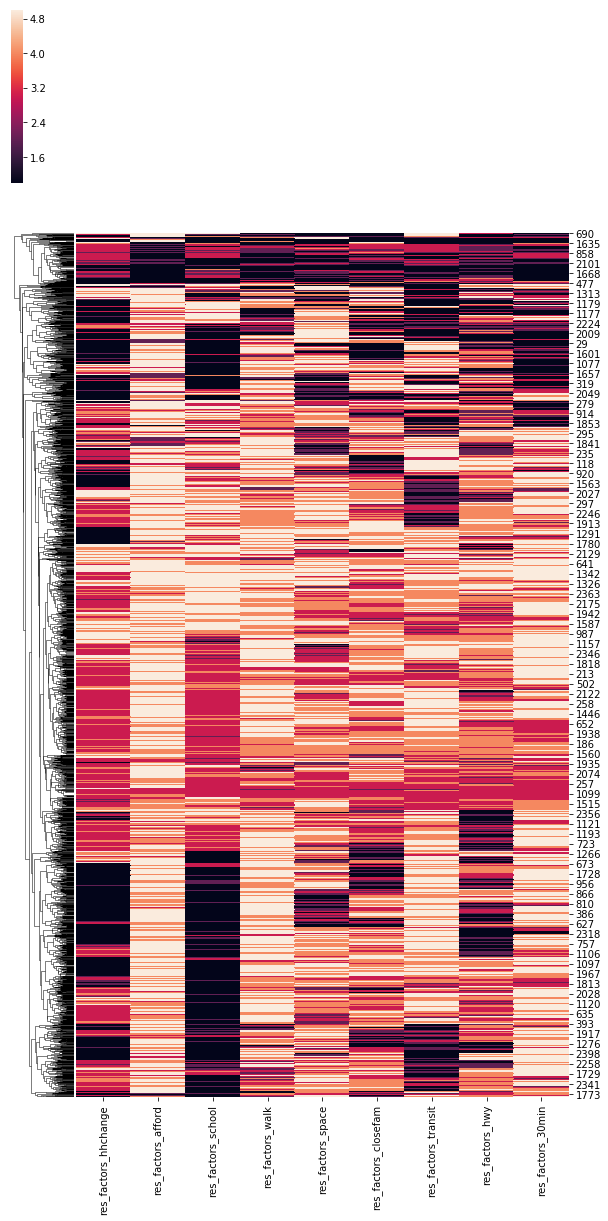

In [66]:
import seaborn as sns

g = sns.clustermap(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'],
                   metric='euclidean',
                   method='average',
                   col_cluster=False,
                  figsize=(10, 20))

In [67]:
from sklearn.metrics import silhouette_score
from numpy import ravel

for nOfClusters in range(2,5):
    # get cluster labels
    clusterLabels = ravel(cut_tree(psSimi_link, nOfClusters)) # formatting cut_tree output with ravel
    # get silhouettes
    silhouette_avg = silhouette_score(psSimi_matrix,clusterLabels,metric='precomputed')
    
    # print results:
    print("For n_clusters =", nOfClusters, 
          "The average silhouette_score is:", silhouette_avg)



For n_clusters = 2 The average silhouette_score is: 0.337141396775
For n_clusters = 3 The average silhouette_score is: 0.238384176104
For n_clusters = 4 The average silhouette_score is: 0.199194328355


In [68]:
#clustering continued if we'd like
import numpy as np
from sklearn.metrics import silhouette_samples

clusterLabels2=np.ravel(cut_tree(psSimi_link, 2))
psrchh.loc[:,('sil2')]=silhouette_samples(psSimi_matrix, clusterLabels2, metric='precomputed')

clusterLabels3=np.ravel(cut_tree(psSimi_link, 3))
psrchh.loc[:,('sil3')]=silhouette_samples(psSimi_matrix, clusterLabels3, metric='precomputed')

clusterLabels4=np.ravel(cut_tree(psSimi_link, 4))
psrchh.loc[:,('sil4')]=silhouette_samples(psSimi_matrix, clusterLabels4, metric='precomputed')

In [70]:
set(psrchh[psrchh.sil4<0].index)

{4,
 15,
 18,
 23,
 36,
 38,
 49,
 79,
 113,
 117,
 119,
 125,
 158,
 159,
 172,
 184,
 187,
 190,
 192,
 193,
 198,
 208,
 210,
 214,
 233,
 237,
 252,
 259,
 295,
 299,
 313,
 335,
 352,
 353,
 359,
 383,
 392,
 416,
 433,
 441,
 453,
 458,
 467,
 468,
 478,
 479,
 495,
 497,
 503,
 535,
 538,
 549,
 578,
 626,
 693,
 700,
 703,
 707,
 719,
 727,
 735,
 740,
 763,
 789,
 834,
 838,
 872,
 883,
 891,
 899,
 902,
 913,
 918,
 946,
 962,
 972,
 980,
 981,
 988,
 990,
 994,
 996,
 1004,
 1021,
 1030,
 1037,
 1050,
 1069,
 1074,
 1075,
 1076,
 1081,
 1082,
 1086,
 1094,
 1117,
 1122,
 1127,
 1134,
 1154,
 1160,
 1171,
 1177,
 1184,
 1194,
 1214,
 1224,
 1238,
 1260,
 1312,
 1313,
 1322,
 1325,
 1331,
 1332,
 1334,
 1336,
 1347,
 1380,
 1385,
 1388,
 1419,
 1423,
 1426,
 1435,
 1447,
 1454,
 1461,
 1482,
 1484,
 1511,
 1525,
 1530,
 1542,
 1550,
 1569,
 1578,
 1584,
 1609,
 1612,
 1616,
 1628,
 1647,
 1651,
 1655,
 1656,
 1662,
 1681,
 1696,
 1698,
 1699,
 1710,
 1715,
 1726,
 1727,
 1737,

In [71]:
set(psrchh[psrchh.sil3<0].index)

{4,
 18,
 23,
 36,
 38,
 49,
 79,
 113,
 117,
 125,
 158,
 159,
 172,
 184,
 190,
 192,
 193,
 208,
 210,
 214,
 233,
 237,
 252,
 259,
 299,
 335,
 352,
 353,
 359,
 433,
 441,
 453,
 458,
 467,
 468,
 478,
 479,
 497,
 503,
 535,
 538,
 578,
 626,
 693,
 700,
 703,
 707,
 719,
 740,
 763,
 789,
 834,
 838,
 872,
 883,
 891,
 902,
 913,
 918,
 962,
 980,
 981,
 988,
 990,
 994,
 1004,
 1021,
 1050,
 1074,
 1076,
 1082,
 1086,
 1094,
 1117,
 1122,
 1127,
 1134,
 1154,
 1160,
 1171,
 1177,
 1184,
 1214,
 1224,
 1238,
 1260,
 1325,
 1332,
 1334,
 1336,
 1347,
 1380,
 1385,
 1388,
 1419,
 1426,
 1447,
 1454,
 1461,
 1482,
 1484,
 1514,
 1569,
 1578,
 1584,
 1609,
 1628,
 1651,
 1662,
 1681,
 1699,
 1710,
 1715,
 1726,
 1727,
 1737,
 1738,
 1744,
 1757,
 1773,
 1809,
 1824,
 1833,
 1839,
 1841,
 1857,
 1867,
 1911,
 1939,
 1949,
 1964,
 1968,
 1970,
 1971,
 1973,
 1980,
 1998,
 2008,
 2009,
 2018,
 2049,
 2052,
 2073,
 2087,
 2108,
 2117,
 2165,
 2185,
 2190,
 2206,
 2217,
 2229,
 2264,
 2

In [72]:
set(psrchh[psrchh.sil2<0].index)

{4,
 18,
 23,
 38,
 49,
 125,
 184,
 190,
 192,
 193,
 208,
 210,
 214,
 299,
 335,
 352,
 433,
 453,
 458,
 468,
 503,
 538,
 578,
 693,
 700,
 703,
 707,
 719,
 740,
 763,
 834,
 838,
 872,
 962,
 981,
 988,
 990,
 1050,
 1074,
 1076,
 1082,
 1094,
 1117,
 1122,
 1154,
 1160,
 1177,
 1184,
 1214,
 1260,
 1325,
 1332,
 1334,
 1336,
 1347,
 1380,
 1385,
 1388,
 1419,
 1426,
 1447,
 1454,
 1461,
 1482,
 1514,
 1569,
 1578,
 1584,
 1609,
 1628,
 1662,
 1699,
 1737,
 1738,
 1744,
 1757,
 1762,
 1773,
 1824,
 1833,
 1839,
 1857,
 1911,
 1949,
 1964,
 1970,
 1971,
 1973,
 1980,
 1998,
 2008,
 2009,
 2049,
 2073,
 2087,
 2108,
 2117,
 2165,
 2185,
 2190,
 2229,
 2264,
 2275,
 2302,
 2361,
 2391}

In [73]:
set(psrchh[psrchh.sil4<0].index)&set(psrchh[psrchh.sil3<0].index)&set(psrchh[psrchh.sil2<0])

set()

In [74]:
psrchh['k3']=clusterLabels2 #setting clusterlables

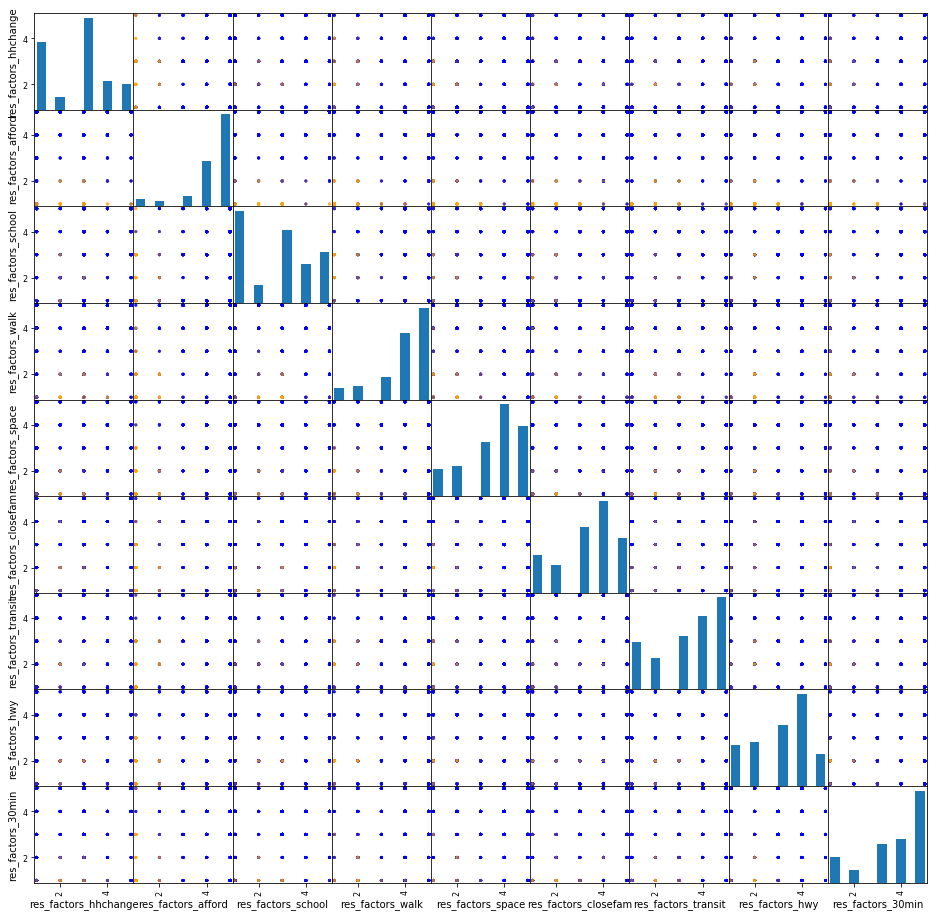

In [75]:
import matplotlib.pyplot as plt

myPalette = {0 : 'b',1 : 'orange',2 : 'r'}      
myColors = [myPalette[l] for l in psrchh.loc[:,'k3']]

pd.plotting.scatter_matrix(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'],
                           figsize=(16, 16),
                           c=myColors)
plt.show() #not much to see here

# Let's try principal component analysis instead

In [100]:
resfacPos=[i for i, s in enumerate(list(psrchh.columns)) if s.startswith('res_factors')]
resfacPos

[5, 6, 7, 8, 9, 10, 11, 12, 13]

In [101]:
resfacNames=psrchh.columns[psrchh.columns.str.contains('res_factors')].tolist()
resfacNames

['res_factors_hhchange',
 'res_factors_afford',
 'res_factors_school',
 'res_factors_walk',
 'res_factors_space',
 'res_factors_closefam',
 'res_factors_transit',
 'res_factors_hwy',
 'res_factors_30min']

In [102]:
psrchh[resfacNames].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 9 columns):
res_factors_hhchange    2418 non-null int64
res_factors_afford      2418 non-null int64
res_factors_school      2418 non-null int64
res_factors_walk        2418 non-null int64
res_factors_space       2418 non-null int64
res_factors_closefam    2418 non-null int64
res_factors_transit     2418 non-null int64
res_factors_hwy         2418 non-null int64
res_factors_30min       2418 non-null int64
dtypes: int64(9)
memory usage: 170.1 KB


In [103]:
psrchh[resfacNames].describe()

,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,2.695616,4.309347,2.776675,4.032672,3.541356,3.355252,3.436311,3.114144,3.774607
std,1.319152,1.045234,1.504015,1.151786,1.256570,1.278355,1.426838,1.256262,1.369047
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [2]:
psrchh[resfacNames].plot.bar(,figsize=(12, 12))

NameError: name 'psrchh' is not defined

In [107]:
from sklearn.preprocessing import StandardScaler

#standardizing
x = StandardScaler().fit_transform(psrchh.loc[:, resfacNames].values)

/Users/geoff/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [110]:
from sklearn.decomposition import PCA
pcaModel=PCA(n_components=3)
psrchhPC = pcaModel.fit_transform(x)

#compotnents:
pd.DataFrame(data=pcaModel.components_.T,index=resfacNames)

,0,1,2
res_factors_hhchange,-0.212229,0.474519,0.487148
res_factors_afford,-0.413974,-0.128691,-0.305026
res_factors_school,-0.208220,0.535075,0.275138
res_factors_walk,-0.444567,-0.371272,0.163105
res_factors_space,-0.282800,0.236096,-0.611436
res_factors_closefam,-0.310795,0.163507,0.023961
res_factors_transit,-0.325079,-0.447334,0.387719
res_factors_hwy,-0.313862,0.212127,-0.206252
res_factors_30min,-0.402286,-0.080874,-0.006841


In [111]:
#scores
pd.DataFrame(data=psrchhPC, columns = ['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3
0,-1.591228,-1.273257,-1.370951
1,0.468083,-1.124442,1.855423
2,-1.699717,-0.640331,0.637674
3,0.230317,0.299945,1.040957
4,3.487136,-0.045883,-0.615957
5,0.342366,-1.572518,1.393119
6,-1.251737,-1.040931,0.076920
7,-0.479698,-2.136367,0.311575
8,4.351286,1.560046,0.593501
9,0.130966,-1.838131,-0.909010


In [113]:
#variance explained:
pcaModel.explained_variance_ratio_.sum()

0.53861547701924506

# Still trying to figure out how best to simplify

In [124]:
psrchh.index=psrchh.h_zip

In [170]:
psrchh.reset_index(inplace=True,drop=True)
resfacNames

['res_factors_hhchange',
 'res_factors_afford',
 'res_factors_school',
 'res_factors_walk',
 'res_factors_space',
 'res_factors_closefam',
 'res_factors_transit',
 'res_factors_hwy',
 'res_factors_30min']

In [185]:
#psrchh.groupby([psrchh.res_factors_hhchange])
df = psrchh.groupby(['h_zip'], as_index=False)[resfacNames].mean() #might be onto something here

df['factor1']=0
df['factor1'].astype(str)
#for i in df:
    #if (df['res_factors_afford']>((df['res_factors_hhchange']) & (df['res_factors_school'])& df['res_factors_space']) & (df['res_factors_closefam'])):# and (df['res_factors_afford']>df['res_factors_transit']) and (df['res_factors_afford']>df['res_factors_hwy']) and (df['res_factors_afford']>df['res_factors_30min']):
       # df['factor1'] = "Affordability"
        
#df['factor1'] = np.where(df['res_factors_afford']> df['res_factors_hhchange'],
                      #   'affordability', 'hhchange')
    
#(df['res_factors_afford'])>((df['res_factors_hhchange']) & (df['res_factors_school'])& (df['res_factors_space']) & (df['res_factors_closefam'])) & (df['res_factors_transit']) & (df['res_factors_hwy']) & (df['res_factors_30min']))

                                        #df['factor1'] =np.where((df['res_factors_hhchange > 'res_factors_afford' & 'res_factors_school' & 'res_factors_walk' & 'res_factors_space' & 'res_factors_closefam' & 'res_factors_transit' & 'res_factors_hwy' & 'res_factors_30min':
                             #    'factor1'='Affordability'
        
df

,h_zip,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min,factor1
0,98001,3.500000,4.500000,3.375000,3.875000,4.000000,3.500000,2.750000,3.875000,4.375000,0
1,98002,3.555556,4.444444,3.444444,3.666667,3.444444,3.000000,3.222222,2.777778,3.444444,0
2,98003,3.214286,4.357143,2.785714,3.142857,3.357143,3.285714,3.285714,2.785714,3.071429,0
3,98004,2.157895,3.789474,2.315789,4.578947,3.315789,3.894737,3.421053,3.894737,3.894737,0
4,98005,3.181818,3.727273,3.363636,4.090909,3.181818,3.545455,2.909091,3.818182,3.545455,0
5,98006,2.880000,4.280000,3.920000,4.040000,3.440000,3.240000,3.120000,4.160000,4.000000,0
6,98007,2.869565,4.217391,3.130435,4.043478,3.347826,3.652174,4.000000,2.782609,4.260870,0
7,98008,2.956522,4.086957,3.391304,3.739130,3.782609,3.782609,3.217391,3.434783,4.086957,0
8,98010,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,1.000000,4.000000,5.000000,0
9,98011,2.800000,4.000000,2.800000,3.600000,3.000000,2.400000,2.600000,3.000000,3.800000,0


# Create a column that lists the top factor in why people moved

In [188]:
df['factor1'] = df[['res_factors_hhchange',
 'res_factors_afford',
 'res_factors_school',
 'res_factors_walk',
 'res_factors_space',
 'res_factors_closefam',
 'res_factors_transit',
 'res_factors_hwy',
 'res_factors_30min']].idxmax(axis=1)

In [189]:
df

,h_zip,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min,factor1
0,98001,3.500000,4.500000,3.375000,3.875000,4.000000,3.500000,2.750000,3.875000,4.375000,res_factors_afford
1,98002,3.555556,4.444444,3.444444,3.666667,3.444444,3.000000,3.222222,2.777778,3.444444,res_factors_afford
2,98003,3.214286,4.357143,2.785714,3.142857,3.357143,3.285714,3.285714,2.785714,3.071429,res_factors_afford
3,98004,2.157895,3.789474,2.315789,4.578947,3.315789,3.894737,3.421053,3.894737,3.894737,res_factors_walk
4,98005,3.181818,3.727273,3.363636,4.090909,3.181818,3.545455,2.909091,3.818182,3.545455,res_factors_walk
5,98006,2.880000,4.280000,3.920000,4.040000,3.440000,3.240000,3.120000,4.160000,4.000000,res_factors_afford
6,98007,2.869565,4.217391,3.130435,4.043478,3.347826,3.652174,4.000000,2.782609,4.260870,res_factors_30min
7,98008,2.956522,4.086957,3.391304,3.739130,3.782609,3.782609,3.217391,3.434783,4.086957,res_factors_afford
8,98010,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,1.000000,4.000000,5.000000,res_factors_space
9,98011,2.800000,4.000000,2.800000,3.600000,3.000000,2.400000,2.600000,3.000000,3.800000,res_factors_afford


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

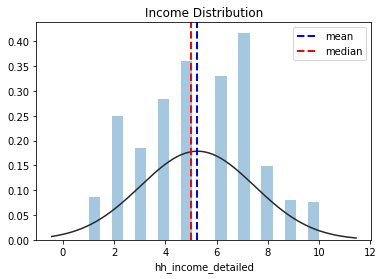

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt # needed for more customization
from scipy.stats import norm
#statistics:
mnVar=psrchh['hh_income_detailed'].mean()
mdVar=psrchh['hh_income_detailed'].median()

sns.distplot(psrchh['hh_income_detailed'].dropna(),kde=False,fit=norm)
plt.title('Income Distribution')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend() #I should update this to include more info

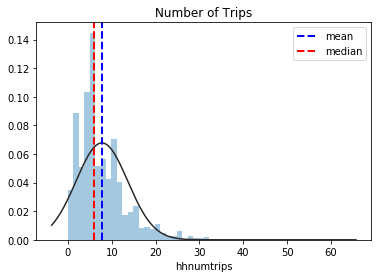

In [78]:
#plotting data
#import seaborn as sns
#from scipy.stats import norm
#import matplotlib.pyplot as plt # needed for more customization
%matplotlib inline

#plotting with mean and median:
mnVar=psrchh['hhnumtrips'].mean()
mdVar=psrchh['hhnumtrips'].median()

sns.distplot(psrchh['hhnumtrips'].dropna(),kde=False,fit=norm)
plt.title('Number of Trips')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [79]:
#New Map
numericColumns =["hhnumtrips", "hh_income_detailed", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min"]
aggregateBY=['h_zip']

#'as_index = False' avoids that the column of zip codes becomes a row name: 
WA_hzip_psrchh=psrchh.groupby (aggregateBY, as_index = False)[numericColumns].mean()

#see result:
WA_hzip_psrchh.head()

,h_zip,hhnumtrips,hh_income_detailed,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
0,98001,10.375000,6.125000,3.500000,4.500000,3.375000,3.875000,4.000000,3.500000,2.750000,3.875000,4.375000
1,98002,6.555556,4.428571,3.555556,4.444444,3.444444,3.666667,3.444444,3.000000,3.222222,2.777778,3.444444
2,98003,5.142857,4.000000,3.214286,4.357143,2.785714,3.142857,3.357143,3.285714,3.285714,2.785714,3.071429
3,98004,5.315789,7.166667,2.157895,3.789474,2.315789,4.578947,3.315789,3.894737,3.421053,3.894737,3.894737
4,98005,7.000000,4.777778,3.181818,3.727273,3.363636,4.090909,3.181818,3.545455,2.909091,3.818182,3.545455


DataError: No numeric types to aggregate

# Getting map info

In [29]:
#%% lets work on getting that map
compressedMap=os.path.join(folderData,'WaZipsMap.zip')
#compressedMap= 'https://github.com/EvansDataScience/data/raw/master/WAzips.zip'

import geopandas as gpd

wazipMap = gpd.GeoDataFrame.from_file(compressedMap)
wazipMap1 = gpd.GeoDataFrame.from_file(compressedMap)

wazipMap1.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [106]:
wazipMap.ZCTA5CE10.dtype

dtype('O')

In [192]:
WA_hzip_psrchh.h_zip.dtype

AttributeError: 'DataFrame' object has no attribute 'hzip'

In [30]:
wazipMap.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int) #setting to int
WA_zip_psrchh.prev_home_loc_zip=WA_zip_psrchh.prev_home_loc_zip.astype(int) #setting to int


In [80]:
#wazipMap=wazipMap[(wazipMap.ZCTA5CE10 <=99403) & (wazipMap.ZCTA5CE10>=98001)] #restricts map just to waState
wazipMap=wazipMap[(wazipMap.ZCTA5CE10.isin(PugetSoundZips.h_zip))] #restricts map to just those counties we specified

In [81]:
#setting other map to int
wazipMap1.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int) #creating second mpa
WA_hzip_psrchh.h_zip=WA_hzip_psrchh.h_zip.astype(int) #setting to int

In [82]:
psrchhWAprevmap=wazipMap.merge(WA_zip_psrchh, left_on='ZCTA5CE10', right_on='prev_home_loc_zip') ## merging data into shapefile

In [83]:
psrchhWAnewmap=wazipMap1.merge(WA_hzip_psrchh, left_on='ZCTA5CE10', right_on='h_zip') ## merging data into shapefile

In [3]:
%matplotlib inline
base = wazipMap.plot(color='grey',figsize=(20,13))

#psrchhWAmap.plot(ax=base, color='pink')
psrchhWAprevmap.plot(ax=base,column='res_factors_afford', cmap='tab20c', scheme='Quantiles', k=5, legend=True) #affordability

NameError: name 'wazipMap' is not defined

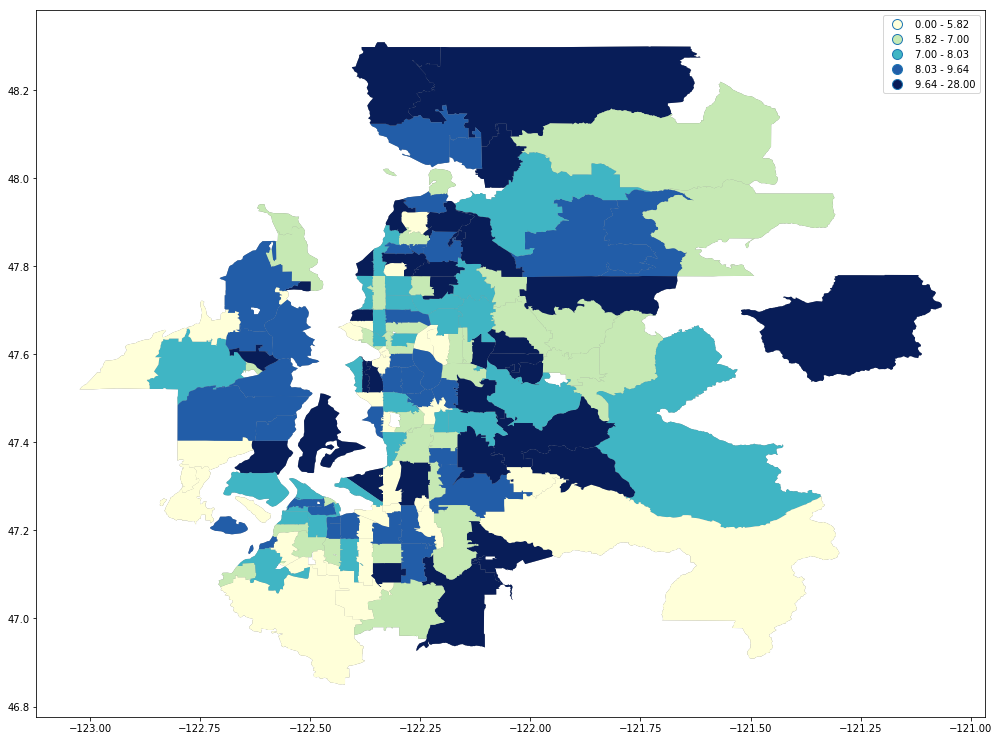

In [85]:
#%matplotlib inline
base = wazipMap.plot(color='grey',figsize=(20,13))

#psrchhWAmap.plot(ax=base, color='pink')
#psrchhWAnewmap.plot(ax=base,column='hh_income_detailed', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #household income
psrchhWAnewmap.plot(ax=base,column='hhnumtrips', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #number of trips

In [38]:
%matplotlib inline
psrchhWAnewmap.plot(ax=base,column='hhnumtrips', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #affordability

In [36]:
%matplotlib inline
psrchhWAnewmap.plot(ax=base,column='hhnumtrips', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True) #affordability

In [56]:
#psrchhWAmap['prev_home_loc_zip'].describe()
psrchhWAmap['res_factors_afford'].describe()

count    154.000000
mean       4.293557
std        0.818968
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: res_factors_afford, dtype: float64

In [115]:
%matplotlib inline
#base = wazipMap(color='gray',figsize=(20,13))
psrchhWAmap.plot(ax=base,column='res_factors_afford', cmap='YlGnBu', scheme='Quantiles', k=5, legend=True)